<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/S_06/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [51]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/S_06/Position_Salaries.csv'
dataset = pd.read_csv(fp)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y_test = y

## Training the Linear Regression model on the whole dataset

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [49]:
# poly degree
dgr = 5

def X_poly(dgr: int,X):
  from sklearn.preprocessing import PolynomialFeatures
  X_poly_prep = PolynomialFeatures(degree = dgr)
  X_poly = X_poly_prep.fit_transform(X)

  return X_poly

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly(dgr,X), y)

# prediction
y_pred = lin_reg_2.predict(X_poly(dgr,X))

# show new data set
print(X, X_poly(dgr,X), sep='\n')


[[1.00]
 [2.00]
 [3.00]
 [4.00]
 [5.00]
 [6.00]
 [7.00]
 [8.00]
 [9.00]
 [10.00]]
[[1.00 1.00 1.00 1.00 1.00 1.00]
 [1.00 2.00 4.00 8.00 16.00 32.00]
 [1.00 3.00 9.00 27.00 81.00 243.00]
 [1.00 4.00 16.00 64.00 256.00 1,024.00]
 [1.00 5.00 25.00 125.00 625.00 3,125.00]
 [1.00 6.00 36.00 216.00 1,296.00 7,776.00]
 [1.00 7.00 49.00 343.00 2,401.00 16,807.00]
 [1.00 8.00 64.00 512.00 4,096.00 32,768.00]
 [1.00 9.00 81.00 729.00 6,561.00 59,049.00]
 [1.00 10.00 100.00 1,000.00 10,000.00 100,000.00]]


## Visualising the Linear Regression results

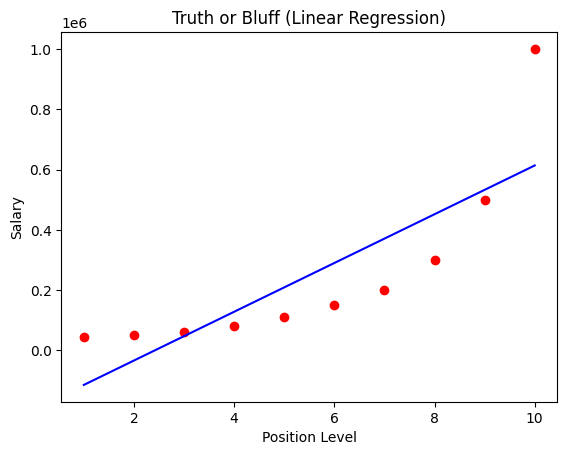

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

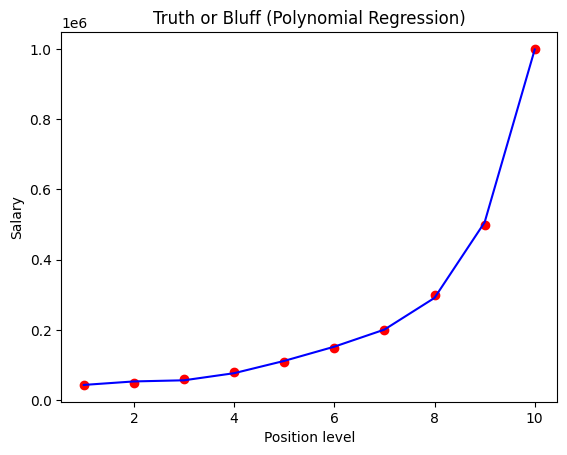

In [25]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly(dgr,X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

/tmp/ipython-input-34-3973904014.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


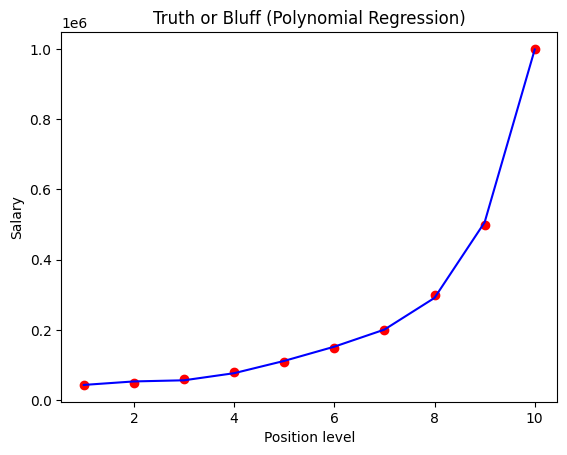

In [34]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly(dgr,X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [27]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [32]:
lin_reg_2.predict(X_poly(dgr, [[6.5]]))

array([174878.07765173])

## Post hoc

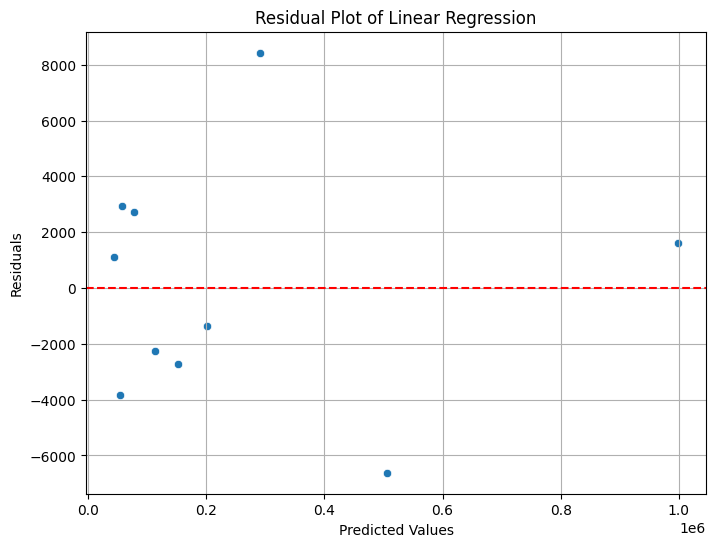

In [52]:
# Calculate residuals
residuals = y_test - y_pred

 # Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred.flatten(), y=residuals.flatten())
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of Linear Regression")
plt.grid(True)
plt.show()

In [46]:
# intercept (bias) and coefficient (weight)
b=np.array(lin_reg_2.intercept_).reshape(1,1)
w=lin_reg_2.coef_

# Set print options to use a custom formatter for floats
np.set_printoptions(formatter={'all': lambda x: f"{x:,.2f}"})
print(f'intercept: {b}')
print(f'coefficients:{w}')


intercept: [[-41,333.33]]
coefficients:[0.00 160,731.00 -100,378.79 28,164.92 -3,446.39 157.69]
[0.00 160,731.00 -100,378.79 28,164.92 -3,446.39 157.69]


6

In [23]:
a=np.array([[2,3],[3,4]])
b = np.array([[4,5],[5,6]])
a.shape, b.shape
d = np.cross(a,b)

print('a shape:',a.shape, 'b shape:',b.shape, 'a:',a,'b:',b,'cross prod:', d, sep='\n')


a shape:
(2, 2)
b shape:
(2, 2)
a:
[[2 3]
 [3 4]]
b:
[[4 5]
 [5 6]]
dot prod:
[[23 28]
 [32 39]]
